In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from obspy import read

In [2]:
#%pip install numpy pandas matplotlib seaborn scikit-learn tensorflow obspy

In [3]:
import os
import sys
path_to_dataset = r'C:\Users\Kono\Desktop\space_apps_2024_seismic_detection\data'
sys.path.append(path_to_dataset)

In [4]:
data_directory = path_to_dataset + r'\lunar\training\data\S12_GradeA'
data_files = os.listdir(data_directory)
data_files = [data_directory + '\\' + file for file in data_files if file.endswith('.csv')]
abstract_dfs = pd.read_csv(r'C:\Users\Kono\Desktop\space_apps_2024_seismic_detection\data\lunar\training\catalogs\apollo12_catalog_GradeA_final.csv')
len(data_files)

76

In [8]:
# Initialize an empty DataFrame with specified columns
df = pd.DataFrame(columns=['file_name', 'start', 'seq', 'id', 'cant_measurements'])

for index, file in enumerate(data_files):
    print(f'Processing file {index+1} of {len(data_files)}')
    
    # Read the CSV file into a temporary DataFrame
    temp_df = pd.read_csv(file)
    
    # Extract the event ID from the file name
    evid_id = file.split('\\')[-1].split('_')[-1].split('evid')[1].split('.')[0]
    
    # Extract the file name without the '.csv' extension
    file_name = file.split('\\')[-1].rstrip('.csv')
    
    # Check if the file name exists in the abstract_dfs DataFrame
    if len(abstract_dfs[abstract_dfs['filename'] == file_name]['time_rel(sec)']) == 0:
        continue  # Skip this file if it doesn't exist in abstract_dfs
    
    # Get the start time from the abstract_dfs DataFrame
    start = abstract_dfs[abstract_dfs['filename'] == file_name]['time_rel(sec)'].iloc[0]
    
    # Create a list of tuples (velocity, time) for each file
    seq = [(v, t) for v, t in zip(temp_df['velocity(m/s)'].tolist(), temp_df['time_rel(sec)'].tolist())]
    
    # Create a temporary dictionary with the required information
    temp_dict = {
        'file_name': file_name, 
        'start': start,  
        'seq': seq,  # Store the entire list of tuples in one cell
        'id': evid_id, 
        'cant_measurements': len(seq)
    }
    
    # Add the temporary dictionary to the main DataFrame
    df = pd.concat([df, pd.DataFrame([temp_dict])], ignore_index=True)

df.head()


Processing file 1 of 76


C:\Users\Kono\AppData\Local\Temp\ipykernel_16612\158728675.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([temp_dict])], ignore_index=True)


Processing file 2 of 76
Processing file 3 of 76
Processing file 4 of 76
Processing file 5 of 76
Processing file 6 of 76
Processing file 7 of 76
Processing file 8 of 76
Processing file 9 of 76
Processing file 10 of 76
Processing file 11 of 76
Processing file 12 of 76
Processing file 13 of 76
Processing file 14 of 76
Processing file 15 of 76
Processing file 16 of 76
Processing file 17 of 76
Processing file 18 of 76
Processing file 19 of 76
Processing file 20 of 76
Processing file 21 of 76
Processing file 22 of 76
Processing file 23 of 76
Processing file 24 of 76
Processing file 25 of 76
Processing file 26 of 76
Processing file 27 of 76
Processing file 28 of 76
Processing file 29 of 76
Processing file 30 of 76
Processing file 31 of 76
Processing file 32 of 76
Processing file 33 of 76
Processing file 34 of 76
Processing file 35 of 76
Processing file 36 of 76
Processing file 37 of 76
Processing file 38 of 76
Processing file 39 of 76
Processing file 40 of 76
Processing file 41 of 76
Processi

,file_name,start,seq,id,cant_measurements
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,73500.0,"[(-6.153278962788711e-14, 0.0), (-7.7012884336...",00002,572415
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,12720.0,"[(-5.481780117043957e-15, 0.0), (-6.8786525555...",00003,572411
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,73020.0,"[(-2.8212463353274303e-14, 0.0), (-3.523317065...",00004,572411
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,4440.0,"[(9.01642264710853e-15, 0.0), (1.1305708384819...",00006,572415
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,52140.0,"[(-1.5835653822406575e-16, 0.0), (-1.872995208...",00007,572411


xa.s12.00.mhz.1975-06-26HR00_evid00198


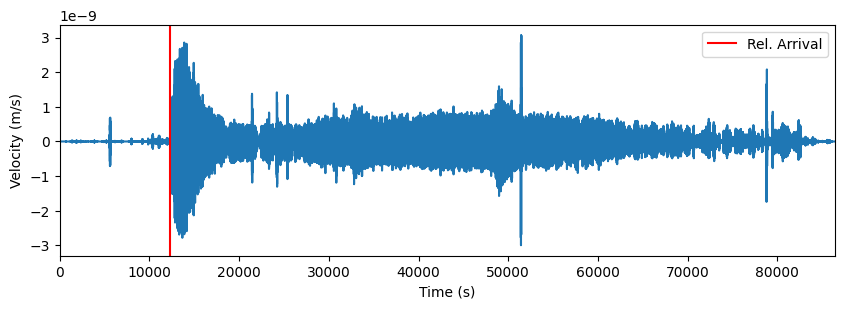

In [17]:
# Plot the trace! 
# Extraer la secuencia completa de la primera fila (índice 0)
seq = df.iloc[74]['seq']

# Separar los tiempos (segunda posición en las tuplas) y las velocidades (primera posición en las tuplas)
csv_times = [t for v, t in seq]  # Tiempos están en la segunda posición de cada tupla
csv_data = [v for v, t in seq]
arrival_time_rel = df.iloc[74]['start']
print(df.iloc[74]['file_name'])
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')

# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])